# Mistral OCR

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import base64
import json
from pathlib import Path
from dotenv import load_dotenv
from mistralai import Mistral, DocumentURLChunk
from mistralai.models import OCRResponse
from mistralai.extra import response_format_from_pydantic_model

from IPython.display import display, Markdown, Image as dImage

# Params

In [3]:
path_data = Path() / "data"
path_input = path_data / "raw"
path_output = path_data / "interim" / "mistral-ocr"  # Store converted

path_output.mkdir(exist_ok=True, parents=True)

In [4]:
MODEL = "mistral-ocr-latest"

# Environment Variables

In [5]:
load_dotenv()

MISTRAL_API_KEY = os.environ["MISTRAL_API_KEY"]

# Clients

In [6]:
client_mistral = Mistral(api_key=MISTRAL_API_KEY)


## PDF Conversion

In [7]:
input_file = "Divulgacion Planetaria Althera.pdf"  # document per local path or URL
output_file = "Divulgacion-Planetaria-Althera.md"
input_doc_path = path_input / input_file


# Read PDF
pdf_file = Path(input_doc_path)
assert pdf_file.is_file()

# Upload PDF
uploaded_file = client_mistral.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)
signed_url = client_mistral.files.get_signed_url(file_id=uploaded_file.id, expiry=1)


In [8]:
print(f"{uploaded_file.id=}")

uploaded_file.id='20e3b1f8-cf25-40a4-bdd8-169e90de5e2c'


In [9]:
client_mistral.files.list()

ListFilesOut(data=[FileSchema(id='20e3b1f8-cf25-40a4-bdd8-169e90de5e2c', object='file', size_bytes=1359430, created_at=1756929287, filename='Divulgacion Planetaria Althera', purpose='ocr', sample_type='ocr_input', source='upload', num_lines=0, mimetype='application/pdf', signature='6141af7ff9c8b9bcb96373eafebc6a50')], object='list', total=1)

In [10]:
# OCR
pdf_response = client_mistral.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url), 
    model=MODEL, 
    include_image_base64=True
    )

In [11]:
Markdown(pdf_response.pages[0].markdown)

# Un nuevo y fascinante vecino: Althéra 

## Índice

1. Historia del descubrimiento
2. Conoce a Althéra
3. Los soles de Althéra
4. Estructura general de Althéra
5. Planetas interiores
6. Planetas exteriores
7. Lunas y satélites menores
8. Fenómenos destacados
9. Habitabilidad y astrobiología
10. Conclusiones y perspectivas futuras

## 1. Historia del descubrimiento

### 1.1 Primeras observaciones y sospechas iniciales

El sistema binario Althéra ( $H D 4579 A B$ ) fue detectado por primera vez en el año 2032 durante una campaña de observación del Observatorio Espacial James Webb, dirigida por la astrofísica chilena Dra. Mariela Estay. La misión principal era estudiar la composición atmosférica de exoplanetas candidatos a la habitabilidad, pero un patrón anómalo en el flujo luminoso proveniente de la constelación de Orión llamó la atención del equipo. El análisis de curvas de luz reveló oscilaciones periódicas dobles, un indicio claro de la presencia de dos estrellas en órbita mutua y varios cuerpos orbitando de forma circumbinaria.

### 1.2 Confirmación mediante técnicas combinadas

En los meses siguientes, un consorcio internacional liderado por la Agencia Espacial Europea (ESA) y el Instituto Max Planck de Astronomía desplegó observaciones complementarias utilizando:

- ELT (Extremely Large Telescope) en el Desierto de Atacama para espectroscopía de alta resolución.
- Telescopio Espacial Nancy Grace Roman para fotometría de gran precisión en tránsitos.
- Interferometría de radio desde la red Very Long Baseline Array (VLBA) para afinar la distancia y parámetros orbitales del sistema.

In [12]:
Markdown(pdf_response.pages[3].markdown)

En conjunto, Althéra constituye un laboratorio natural para estudiar cómo la vida -si existe o llegara a desarrollarse- podría adaptarse a condiciones lumínicas, gravitacionales y climáticas mucho más complejas que las de nuestro sistema solar.

Si quieres, puedo continuar directamente con la Sección 3: Las estrellas centrales, donde detallaríamos propiedades físicas, químicas y de emisión de cada una, incluyendo su papel en la habitabilidad del sistema.

Perfecto, aquí tienes la Sección 3 con un tono técnico pero atractivo, para que las dos estrellas de Althéra cobren protagonismo propio:

# 3. Los soles de Althéra 

### 3.1 Clasificación espectral y diferencias principales

El corazón del sistema Althéra está formado por un par estelar bien contrastado:

- Althéra A (HD 4579 A): estrella de tipo F7V, más caliente y luminosa que el Sol, con un tono blanco-dorado.
- Althéra B (HD 4579 B): estrella de tipo K2V, más fría y longeva, de tonalidad naranja intensa.

Esta combinación de espectros produce un ambiente luminoso único en los planetas circumbinarios, donde la radiación es más equilibrada en el rango visible y cercana al infrarrojo, favoreciendo la fotosíntesis de potenciales formas de vida adaptadas a ambas fuentes.

### 3.2 Masas, radios y luminosidades comparadas

El sistema binario Althéra está formado por dos estrellas de características bien contrastadas: Althéra A, más masiva y luminosay Althéra B, más pequeña y fría. Aunque la luminosidad de Althéra A domina el aporte energético global, la presencia de Althéra B, O, actúa como un regulador térmico que suaviza las variaciones extremas de temperatura en la zona habitable, contribuyendo a su estabilidad a largo plazo.
![img-0.jpeg](img-0.jpeg)

Figure 1: Ocaso en Althéra

[OCRImageObject(id='img-0.jpeg', top_left_x=707, top_left_y=1532, bottom_right_x=1425, bottom_right_y=2011, image_base64='', image_annotation=None)]
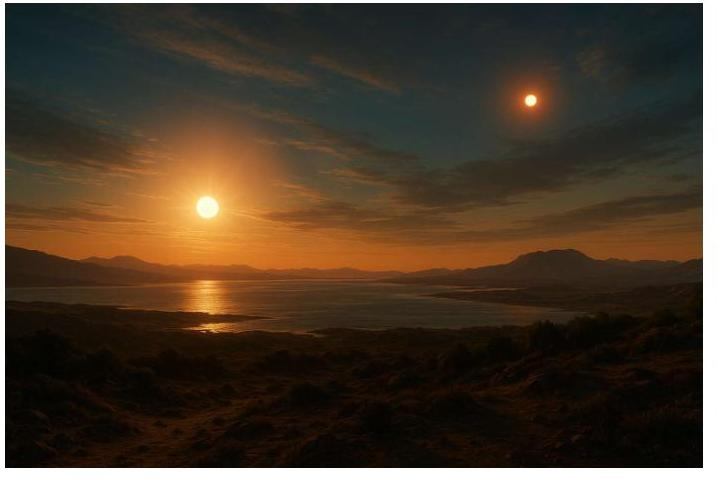

In [13]:
pdf_response.pages[3].images
# no se muestran las imagenes en el markdown (img-0.jpeg :: Figure 1: Ocaso en Althéra)

In [14]:
# Tabla
Markdown(pdf_response.pages[4].markdown)

Divulgación Planetaria Althéra

| Parámetro | Althéra A | Althéra B |
| :-- | :-- | :-- |
| Masa | $1,28 \mathrm{M} \odot$ | $0,82 \mathrm{M} \odot$ |
| Radio | $1,32 \mathrm{RO}$ | $0,74 \mathrm{RO}$ |
| Luminosidad | $2,4 \mathrm{LO}$ | $0,39 \mathrm{LO}$ |
| Temperatura superficial | 6.350 K | 4.950 K |

La diferencia de luminosidad significa que, aunque Althéra A domina el aporte energético, Althéra B contribuye de manera significativa a la estabilidad térmica del sistema, suavizando las variaciones extremas en la zona habitable.

# 3.3 Ciclo de vida y edad estimada del sistema binario 

Estudios de metalicidad realizados con el ELT indican que ambas estrellas tienen composiciones químicas similares, con una proporción de elementos pesados algo mayor que la del Sol ( $[\mathrm{Fe} / \mathrm{H}] \approx+0,08$ ). Esto sugiere que se formaron a partir de la misma nube molecular hace aproximadamente $\mathbf{4 . 9 0 0}$ millones de años, una edad comparable a la del Sistema Solar.

Althéra A, al ser más masiva, evolucionará hacia gigante roja en unos 4.000 millones de años, mientras que Althéra B permanecerá estable durante varios miles de millones más. Esta diferencia temporal tendrá un fuerte impacto en la evolución futura de los planetas circumbinarios.

### 3.4 Interacción gravitatoria y efectos sobre la zona habitable

La órbita mutua de las dos estrellas, con una separación media de $\mathbf{0 , 4 2}$ UA y una excentricidad de 0,12 , genera un entorno gravitacional complejo. Sin embargo, simulaciones dinámicas realizadas por el Centro de Dinámica Planetaria de París muestran que:

- Las órbitas de los planetas a más de 1,8 UA del centro binario son estables a escalas de miles de millones de años.
- La zona habitable circumbinaria se extiende aproximadamente de 1,9 a 2,7 UA, con Aurelia III en el centro de esta franja.
- Las perturbaciones periódicas pueden producir ciclos climáticos más largos que los terrestres, algo que influiría en la biosfera si existe vida.

Además, la interacción gravitacional da lugar a un fenómeno visual característico: eclipses parciales recíprocos visibles desde los planetas, donde una estrella pasa por delante de la otra, provocando descensos breves en la luminosidad global y alteraciones temporales en la climatología local.

In [15]:
# Grafico
# Obtiene el titulo: Planetas del sistema Althéra: distancia vs masa img-1.jpeg
Markdown(pdf_response.pages[6].markdown)

# 4. Estructura general del sistema planetario 

### 4.1 Distribución de órbitas y distancias medias

El sistema circumbinario de Althéra alberga cinco planetas principales, múltiples lunas y un cinturón de asteroides prominente. Las órbitas son relativamente coplanares, con inclinaciones menores a $3^{\circ}$, lo que sugiere una formación a partir de un disco protoplanetario bien definido.

Planetas del sistema Althéra: distancia vs masa
![img-1.jpeg](img-1.jpeg)

A continuación se muestran las distancias medias al baricentro binario y los períodos orbitales:

| Cuerpo | Tipo | Distancia media (UA) | Periodo orbital (días terrestres) |
| :--: | :--: | :--: | :--: |
| Thyros I (HD 4579 $A b)$ | Rocoso | 0,78 | 215 |
| Névalis II (HD 4579 $A c)$ | Rocoso | 1,36 | 397 |
| Cinturón de Arges | Asteroides metálicos | $1,65-1,85$ |  |
| Aurelia III (HD 4579 $A d)$ | Rocoso, habitable | 2,21 | 589 |

OCRImageObject(id='img-1.jpeg', top_left_x=233, top_left_y=638, bottom_right_x=1412, bottom_right_y=1401, image_base64='', image_annotation=None)
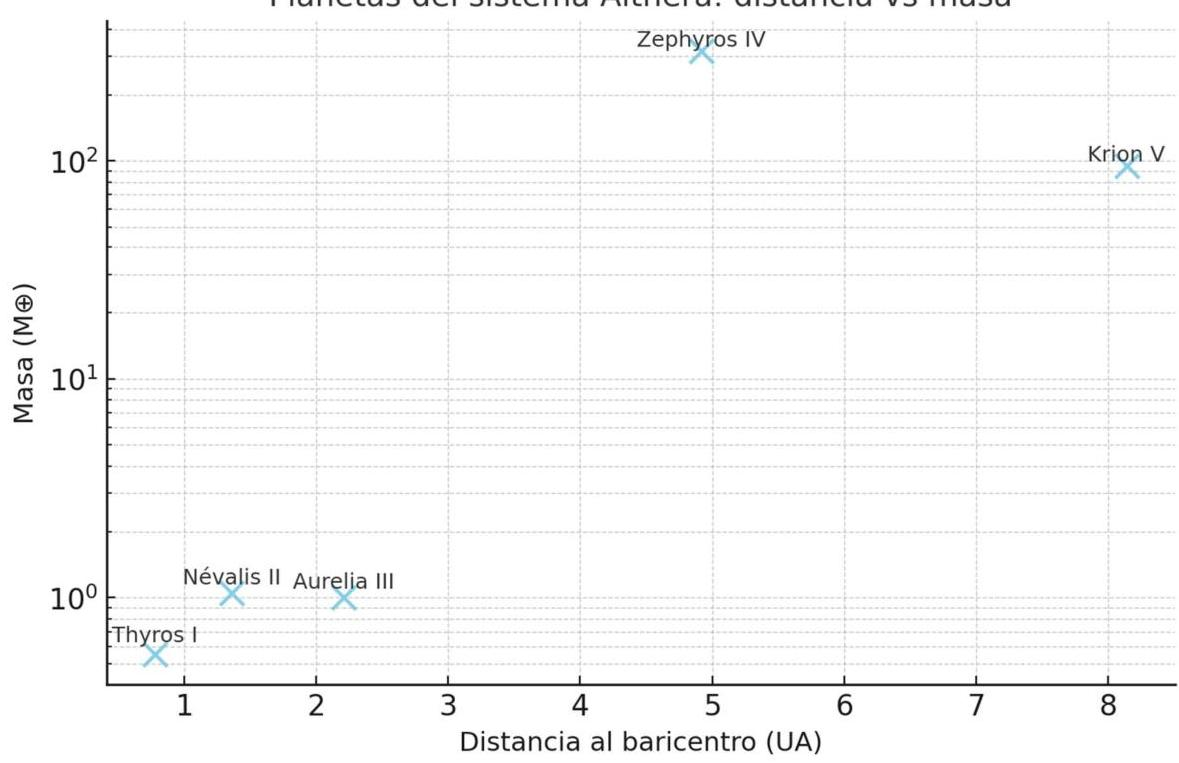

In [16]:
pdf_response.pages[6].images[0]

### Export to Markdown

In [17]:
input_doc_path

WindowsPath('data/raw/Divulgacion Planetaria Althera.pdf')

In [18]:
# With no images

doc_md = "\n\n".join([page.markdown for page in pdf_response.pages])

output_doc_path = path_output/ output_file

with open(output_doc_path, 'w', encoding='utf-8') as f:
    f.write(doc_md)

In [19]:
# With embedded images

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str


def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

output_doc_path = path_output/ "Divulgacion-Planetaria-Althera-wimgtb.md"  # incrustada
doc_md_wimgtb = get_combined_markdown(pdf_response)

with open(output_doc_path, 'w', encoding='utf-8') as f:
    f.write(doc_md_wimgtb)

# Annotations API


BBOX Annotations: SEcond stage with a VLM to analyze every element BBox with the provided instructions  

Document Annotation:
* pdf/image: All pages to image and prompt them to a VLM
* pptx/docx/...: Pages to MD and send to a VLM
* ONLY UP TO 8 PAGES



In [20]:
from pydantic import BaseModel, Field

# BBOX Annotation response formats
class Image(BaseModel):
  image_type: str = Field(..., description="The type of the image.")
  short_description: str = Field(..., description="A description in Spanish describing the image.")
  content: str = Field(None, description="Extract and organize only the text content from the image. If there is no text, leave it empty")
  summary: str = Field(..., description="Summarize the image.")

  # ... “Don’t assign a default, the user must provide a value for this field.”


# Document Annotation response format
class Document(BaseModel):
  language: str = Field(..., description="Language in ISO 639 code")
  chapter_titles: list[str] = Field(..., description="Get sections/subsections structure up to the bottom level. Include section number of generate them")
  urls: list[str]

In [21]:
response_bbox_annot = client_mistral.ocr.process(
    model=MODEL,
    document=DocumentURLChunk(
      document_url=signed_url.url
    ),
    bbox_annotation_format=response_format_from_pydantic_model(Image),

    include_image_base64=True
  )

{
  "image_type": "digital art",
  "short_description": "Una imagen de arte digital que muestra un atardecer con dos soles sobre un paisaje costero.",
  "content": "",
  "summary": "La imagen es una representación de arte digital que captura un atardecer espectacular. Dos soles brillantes están visibles en el cielo, uno más grande y cercano al horizonte y otro más pequeño y alto. El cielo está pintado con tonos cálidos de naranja, amarillo y rojo, creando una atmósfera serena y tranquila. Debajo, se extiende un paisaje costero con aguas calmadas que reflejan los colores del cielo. En el primer plano, hay un terreno rocoso y montañoso que añade profundidad y textura a la escena. La imagen transmite una sensación de paz y belleza natural."
}


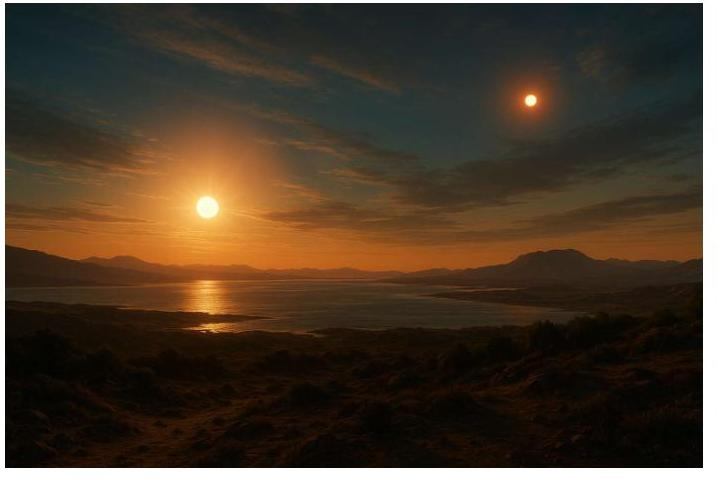

In [22]:
ex_image_mistral= response_bbox_annot.pages[3].images[0]
print(ex_image_mistral.image_annotation)


b64_str = ex_image_mistral.image_base64
b64_data = b64_str.split(",")[1]
dImage(data=base64.b64decode(b64_data))



In [23]:
len(response_bbox_annot.pages)

17

{
  "image_type": "handwritten notes",
  "short_description": "Notas escritas a mano sobre estrellas y observaciones astronómicas.",
  "content": "Campaña 13-oct-2034\n- Oscilaciones periódicas dobles\n- Posible sistema binario\n- Exoplanetas?\n\nx Bellatrix\nx Betelgeuse\nx Althéa\nx Rigel\nx Saiph",
  "summary": "La imagen contiene notas escritas a mano sobre observaciones astronómicas, específicamente sobre las estrellas Bellatrix, Betelgeuse, Althéa, Rigel y Saiph. Las notas mencionan una campaña de observación del 13 de octubre de 2034, y discuten oscilaciones periódicas dobles, la posibilidad de un sistema binario y la presencia de exoplanetas."
}


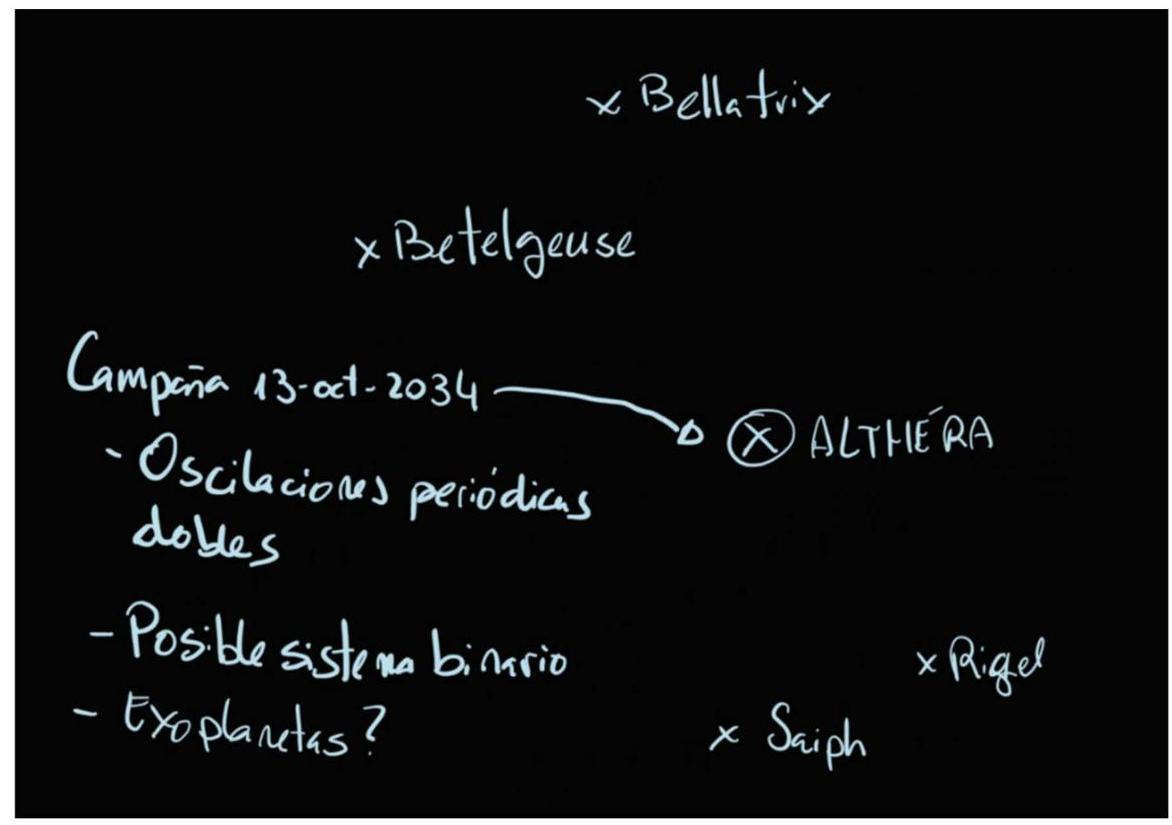

In [24]:
ex_image_mistral= response_bbox_annot.pages[16].images[0]
print(ex_image_mistral.image_annotation)


b64_str = ex_image_mistral.image_base64
b64_data = b64_str.split(",")[1]
dImage(data=base64.b64decode(b64_data))


In [25]:
response_doc_annot = client_mistral.ocr.process(
    model=MODEL,
    document=DocumentURLChunk(
      document_url=signed_url.url
    ),
    document_annotation_format=response_format_from_pydantic_model(Document),
    pages=list(range(8)),
    include_image_base64=True
  )

In [ ]:


json.loads(response_doc_annot.document_annotation)

{'language': 'es',
 'chapter_titles': ['Divulgación Planetaria Althéra',
  'Un nuevo y fascinante vecino: Althéra',
  'Índice',
  '1. Historia del descubrimiento',
  '1.1 Primeras observaciones y sospechas iniciales',
  '1.2 Confirmación mediante técnicas combinadas',
  '1.3 Descubrimiento revolucionario de la zona habitable circumbinaria',
  '1.4 Importancia científica y proyección futura',
  '2. Conoce a Althéra',
  '2.1 Localización en la galaxia',
  '2.2 Disposición y dinámica de un sistema binario',
  '2.3 Singularidades astronómicas',
  '3. Los soles de Althéra',
  '3.1 Clasificación espectral y diferencias principales',
  '3.2 Masas, radios y luminosidades comparadas',
  '3.3 Ciclo de vida y edad estimada del sistema binario',
  '3.4 Interacción gravitatoria y efectos sobre la zona habitable',
  'Adéndum: Althéra A y B: Una danza de luz y gravedad',
  '4. Estructura general del sistema planetario',
  '4.1 Distribución de órbitas y distancias medias',
  '4.2 Tipología de planetas

In [27]:
{
  "image_type": "handwritten notes",
  "short_description": "Notas escritas a mano sobre estrellas y posibles sistemas binarios.",
  "content": "Campaña 13-oct-2034\n- Oscilaciones periódicas dobles\n- Posible sistema binario\n- Exoplanetas?\n\nx Bellatrix\nx Betelgeuse\nx Rigel\nx Saiph\n\n⊕ ALTHÉRA",
  "summary": "La imagen contiene notas escritas a mano sobre una campaña de observación astronómica programada para el 13 de octubre de 2034. Las notas mencionan oscilaciones periódicas dobles, la posibilidad de un sistema binario y la existencia de exoplanetas. También se listan varias estrellas, incluyendo Bellatrix, Betelgeuse, Rigel y Saiph, y se hace referencia a Althéa con un símbolo específico."
}

{'image_type': 'handwritten notes',
 'short_description': 'Notas escritas a mano sobre estrellas y posibles sistemas binarios.',
 'content': 'Campaña 13-oct-2034\n- Oscilaciones periódicas dobles\n- Posible sistema binario\n- Exoplanetas?\n\nx Bellatrix\nx Betelgeuse\nx Rigel\nx Saiph\n\n⊕ ALTHÉRA',
 'summary': 'La imagen contiene notas escritas a mano sobre una campaña de observación astronómica programada para el 13 de octubre de 2034. Las notas mencionan oscilaciones periódicas dobles, la posibilidad de un sistema binario y la existencia de exoplanetas. También se listan varias estrellas, incluyendo Bellatrix, Betelgeuse, Rigel y Saiph, y se hace referencia a Althéa con un símbolo específico.'}

In [28]:
def replace_images_in_markdown_with_annot(markdown_str: str, images_dict: dict) -> str:
    for img_name, annot_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({annot_str})")
    return markdown_str


def get_annot_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = json.loads(img.image_annotation)['summary']
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

In [29]:
output_doc_path = path_output/ "Divulgacion-Planetaria-Althera-wimgannot.md"  # incrustada
doc_md_wimgannot = get_annot_markdown(response_bbox_annot)

with open(output_doc_path, 'w', encoding='utf-8') as f:
    f.write(doc_md_wimgannot)

# Save page chunks

In [30]:
path_output_chunks = path_data / "processed" / "chunks" / "pages" 

path_output_chunks.mkdir(
    parents=True, exist_ok=True
)

dc_chunks = []

for page in pdf_response.pages:
    dc_chunks.append(
        {"page_content": page.markdown, "metadata": {"source": "Althera"}}
        )

with open(path_output_chunks / 'Althera.json', 'w') as f:
    json.dump(dc_chunks, f)

# Resultados:
* Revisar fallos en captura de encabezados (deseado ignorarlos)
* Revisar tablas
* Revisar Jerarquía de Headers